In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import h5py
import yaml
import os.path
import json

In [2]:
# load data from image files according the the yaml file
background_path = os.path.join('/Users','jpga', 'AWA_DATA', '01_16_6D_PSR')
data_path = os.path.join(background_path, 'reconstruction_scan')
run_data = yaml.safe_load(open(os.path.join(data_path, 'scan5.yml')))

In [3]:
# PV names of scanning elements
quad_pv_name = "AWA:Bira3Ctrl:Ch10"
tdc_pv_name = "pi:QBCR1:Ch7:EnablePulse"
dipole_pv_name = "AWA:Bira4Ctrl:Ch01"

In [4]:
# test data
dyg14_fname = 'DYG14_1705446972.h5'
dyg15_fname = 'DYG15_1705447643.h5'
dyg14_test = h5py.File(os.path.join(data_path, dyg14_fname))
dyg15_test = h5py.File(os.path.join(data_path, dyg15_fname))
print(dyg14_test['images'].attrs.keys())
dyg14_roi = json.loads(json.dumps(dyg14_test['images'].attrs['roi']))
dyg15_roi = json.loads(json.dumps(dyg15_test['images'].attrs['roi']))
print(dyg14_roi)
print(dyg15_roi)

<KeysViewHDF5 ['AWA:Bira3Ctrl:Ch10', 'AWA:Bira4Ctrl:Ch01', 'AWAVXI11ICT:Ch4', 'alias', 'array_data_suffix', 'array_n_cols_suffix', 'array_n_rows_suffix', 'background_file', 'bounding_box_half_width', 'charge_atol', 'extra_pvs', 'ip_address', 'min_log_intensity', 'n_fitting_restarts', 'pi:QBCR1:Ch7:EnablePulse', 'resolution', 'return_statistics', 'roi', 'save_image_location', 'screen_name', 'target_charge', 'target_charge_pv', 'testing', 'threshold', 'verbose', 'visualize', 'wait_time']>
{'xcenter': 556, 'ycenter': 806, 'xwidth': 700, 'ywidth': 700}
{'xcenter': 591, 'ycenter': 1079, 'xwidth': 700, 'ywidth': 700}


In [5]:
dyg14_center = [556, 806]
dyg15_center = [591, 1079]

In [6]:
# load backgrounds
background_dipole_off = np.load(os.path.join(data_path, 'DYG14_background.npy'))
background_dipole_on = np.load(os.path.join(data_path, 'DYG15_background.npy'))
background_dipole_off = background_dipole_off[dyg14_center[0]-350:dyg14_center[0]+350, dyg14_center[1]-350:dyg14_center[1]+350]
background_dipole_on = background_dipole_off[dyg15_center[0]-350:dyg15_center[0]+350, dyg15_center[1]-350:dyg15_center[1]+350]

In [7]:
run_data = pd.DataFrame(run_data)
run_data

,AWA:Bira3Ctrl:Ch10,AWA:Bira4Ctrl:Ch01,AWAVXI11ICT:Ch4,pi:QBCR1:Ch7:EnablePulse,save_filename
0,-0.4,0.00,"[1.6e-09, 1.4e-09, 1.6e-09, 1.6e-09, 1.6e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
1,-0.3,0.00,"[1.6e-09, 1.4e-09, 1.4e-09, 1.6e-09, 1.6e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
2,-0.2,0.00,"[1.4e-09, 1.4e-09, 1.6e-09, 1.6e-09, 1.4e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
3,-0.1,0.00,"[1.5e-09, 1.5e-09, 1.5e-09, 1.6e-09, 1.6e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
4,0.0,0.00,"[1.5e-09, 1.5e-09, 1.6e-09, 1.4e-09, 1.4e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
5,0.1,0.00,"[1.5e-09, 1.5e-09, 1.5e-09, 1.6e-09, 1.5e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
6,0.2,0.00,"[1.4e-09, 1.5e-09, 1.4e-09, 1.5e-09, 1.5e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
7,0.3,0.00,"[1.4e-09, 1.4e-09, 1.5e-09, 1.4e-09, 1.4e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
8,0.4,0.00,"[1.5e-09, 1.5e-09, 1.6e-09, 1.5e-09, 1.4e-09]",0,/home/awa/awa_data/01-16_6DReconstruction/reco...
9,-0.4,0.00,"[1.4e-09, 1.4e-09, 1.6e-09, 1.6e-09, 1.5e-09]",1,/home/awa/awa_data/01-16_6DReconstruction/reco...


In [8]:
# create a pivot table out of the data to collect settings
pivot_data = pd.pivot(
    run_data, index=[tdc_pv_name, dipole_pv_name],
    columns=quad_pv_name,
    values="save_filename"
)

In [9]:
pivot_data = pivot_data.sort_values([tdc_pv_name, dipole_pv_name], ascending=[True, False])
pivot_data

AWA:Bira3Ctrl:Ch10                                                                        -0.4  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                        -0.3  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                        -0.2  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                        -0.1  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                         0.0  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                         0.1  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   

AWA:Bira3Ctrl:Ch10                                                                         0.2  \
pi:QBCR1:Ch7:EnablePulse AWA:Bira4Ctrl:Ch01                                                      
0                         0.00               /home/awa/awa_data/01-16_6DReconstruction/reco...   
                         -3.68               /home/awa/awa_data/01-16_6DReconstruction/reco...   
1                         0.00               /home/awa/awa_data/01-16_6DRe

In [10]:
# get numpy values in the correct shape
num_rows, num_cols = pivot_data.shape
print(num_rows, num_cols)
fnames = pivot_data.values.reshape(2,2,num_cols)
fnames 

4 9


array([[['/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446264.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446279.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446307.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446314.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446324.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446338.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446354.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446371.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG14_1705446388.h5'],
        ['/home/awa/awa_data/01-16_6DReconstruction/reconstruction_scan/DYG15_1705446648.h5',
         '/home/awa/awa_data/01-16_6DReconstruction/reconst

In [11]:
# create function to get data from h5 files
import numpy as np
def read_file(fname):
    with h5py.File(fname) as f:
        data_x = np.array((
            f["images"].attrs[quad_pv_name],
            f["images"].attrs[tdc_pv_name],
            f["images"].attrs[dipole_pv_name],
        ))
        images = f["images"][:]

    return data_x, images

In [12]:
# function to map PV values to physical values

p0c = 43.3e6 # design momentum eV/c
C_LIGHT = 299792458
TDC_V = 3.7e6 # need to double check this value // verify calibration value
BEND_ON_PV_VALUE = -3.68 # double check
theta = 20.0*3.1416/180.0 # bend angle in radians
l_bend = 0.3018 # bend length
l_arc = l_bend * theta / (2*np.sin(theta/2)) # arc length when dipole on
BEND_G = theta/l_arc # double check 0.3018 value

def quad_pv_to_k(quad_pv_value, p0c):
    gradient = quad_pv_value*100*1.32e-2/1.29*1.04
    beam_rigidity = p0c / C_LIGHT
    return gradient / beam_rigidity

def tdc_pv_to_v(tdc_pv_value):
    if tdc_pv_value == 0:
        return 0
    elif tdc_pv_value == 1:
        return TDC_V
    else: 
        raise ValueError("TDC PV value must be 0 or 1")
    
def bend_pv_to_g(bend_pv_value):
    if bend_pv_value == 0:
        return 2.22e-16 #machine epsilon for differentiability
    elif bend_pv_value == BEND_ON_PV_VALUE:
        return BEND_G
    else:
        raise ValueError("BEND PV value must be 0 or {}".format(BEND_ON_PV_VALUE))

In [13]:
# get data from files

train_x = []
train_x_physical_units = []
train_y = []
for i in range(len(fnames)):
    tx = []
    txp = []
    ty = []
    for j in range(len(fnames[0])):
        ttx = []
        ttxp = []
        tty = []
        for k in range(len(fnames[0,0])):
            fname_list = os.path.split(fnames[i,j,k])
            fname = os.path.join(data_path, fname_list[-1])
            
            data_x, images = read_file(fname)

            print(data_x)
            k = quad_pv_to_k(data_x[0], p0c)
            v = tdc_pv_to_v(data_x[1])
            g = bend_pv_to_g(data_x[2])
            data_x_physical_units = [k, v, g]
            print(data_x_physical_units)
            print(images.shape)

            ttx += [data_x]
            ttxp += [data_x_physical_units]
            tty += [images]

        tx += [ttx]
        txp += [ttxp]
        ty += [tty]

    train_x += [tx]
    train_x_physical_units += [txp]
    train_y += [ty]

train_x = np.array(train_x).transpose([2,0,1,3])
train_x_physical_units = np.array(train_x_physical_units).transpose([2,0,1,3])
train_y = np.array(train_y).transpose([2,0,1,3,4,5])

##
# params: [number of quad strengths, number of tdc voltages (2, off/on), number of dipole angles (2, off/on),
# number of scanning elements (3)]
# images: [number of quad strengths, number of tdc voltages (2, off/on), number of
# dipole angles (2, off/on), number of images per parameter configuration, width in pixels, height in pixels]

[-0.4  0.   0. ]
[-2.9472050868639563, 0, 2.22e-16]
(5, 700, 700)
[-0.3  0.   0. ]
[-2.2104038151479672, 0, 2.22e-16]
(5, 700, 700)
[-0.2  0.   0. ]
[-1.4736025434319782, 0, 2.22e-16]
(5, 700, 700)
[-0.1  0.   0. ]
[-0.736801271715989, 0, 2.22e-16]
(5, 700, 700)
[0. 0. 0.]
[0.0, 0, 2.22e-16]
(5, 700, 700)
[0.1 0.  0. ]
[0.736801271715989, 0, 2.22e-16]
(5, 700, 700)
[0.2 0.  0. ]
[1.4736025434319786, 0, 2.22e-16]
(5, 700, 700)
[0.3 0.  0. ]
[2.2104038151479672, 0, 2.22e-16]
(5, 700, 700)
[0.4 0.  0. ]
[2.9472050868639563, 0, 2.22e-16]
(5, 700, 700)
[-0.4   0.   -3.68]
[-2.9472050868639563, 0, 1.1507526812481461]
(5, 700, 700)
[-0.3   0.   -3.68]
[-2.2104038151479672, 0, 1.1507526812481461]
(5, 700, 700)
[-0.2   0.   -3.68]
[-1.4736025434319782, 0, 1.1507526812481461]
(5, 700, 700)
[-0.1   0.   -3.68]
[-0.736801271715989, 0, 1.1507526812481461]
(5, 700, 700)
[ 0.    0.   -3.68]
[0.0, 0, 1.1507526812481461]
(5, 700, 700)
[ 0.1   0.   -3.68]
[0.736801271715989, 0, 1.1507526812481461]
(5, 7

In [14]:
train_x.shape

(9, 2, 2, 3)

In [15]:
# sort
train_x.sort(axis=0)
train_x

array([[[[-0.4 ,  0.  ,  0.  ],
         [-0.4 ,  0.  , -3.68]],

        [[-0.4 ,  1.  ,  0.  ],
         [-0.4 ,  1.  , -3.68]]],


       [[[-0.3 ,  0.  ,  0.  ],
         [-0.3 ,  0.  , -3.68]],

        [[-0.3 ,  1.  ,  0.  ],
         [-0.3 ,  1.  , -3.68]]],


       [[[-0.2 ,  0.  ,  0.  ],
         [-0.2 ,  0.  , -3.68]],

        [[-0.2 ,  1.  ,  0.  ],
         [-0.2 ,  1.  , -3.68]]],


       [[[-0.1 ,  0.  ,  0.  ],
         [-0.1 ,  0.  , -3.68]],

        [[-0.1 ,  1.  ,  0.  ],
         [-0.1 ,  1.  , -3.68]]],


       [[[ 0.  ,  0.  ,  0.  ],
         [ 0.  ,  0.  , -3.68]],

        [[ 0.  ,  1.  ,  0.  ],
         [ 0.  ,  1.  , -3.68]]],


       [[[ 0.1 ,  0.  ,  0.  ],
         [ 0.1 ,  0.  , -3.68]],

        [[ 0.1 ,  1.  ,  0.  ],
         [ 0.1 ,  1.  , -3.68]]],


       [[[ 0.2 ,  0.  ,  0.  ],
         [ 0.2 ,  0.  , -3.68]],

        [[ 0.2 ,  1.  ,  0.  ],
         [ 0.2 ,  1.  , -3.68]]],


       [[[ 0.3 ,  0.  ,  0.  ],
         [ 0.3 ,  0.  , -3.68]

In [16]:
train_x_physical_units.shape

(9, 2, 2, 3)

In [17]:
# sort
train_x_physical_units.sort(axis=0)
train_x_physical_units

array([[[[-2.94720509e+00,  0.00000000e+00,  2.22000000e-16],
         [-2.94720509e+00,  0.00000000e+00,  1.15075268e+00]],

        [[-2.94720509e+00,  3.70000000e+06,  2.22000000e-16],
         [-2.94720509e+00,  3.70000000e+06,  1.15075268e+00]]],


       [[[-2.21040382e+00,  0.00000000e+00,  2.22000000e-16],
         [-2.21040382e+00,  0.00000000e+00,  1.15075268e+00]],

        [[-2.21040382e+00,  3.70000000e+06,  2.22000000e-16],
         [-2.21040382e+00,  3.70000000e+06,  1.15075268e+00]]],


       [[[-1.47360254e+00,  0.00000000e+00,  2.22000000e-16],
         [-1.47360254e+00,  0.00000000e+00,  1.15075268e+00]],

        [[-1.47360254e+00,  3.70000000e+06,  2.22000000e-16],
         [-1.47360254e+00,  3.70000000e+06,  1.15075268e+00]]],


       [[[-7.36801272e-01,  0.00000000e+00,  2.22000000e-16],
         [-7.36801272e-01,  0.00000000e+00,  1.15075268e+00]],

        [[-7.36801272e-01,  3.70000000e+06,  2.22000000e-16],
         [-7.36801272e-01,  3.70000000e+06,  1.150

In [18]:
train_y.shape

(9, 2, 2, 5, 700, 700)

In [19]:
# see if ref img is saturated
#np.argwhere(train_y[10,0,0][0] == np.amax(train_y[10,0,0][0]))

In [49]:
from skimage import filters
from scipy.ndimage import median_filter
def postprocessing(
        raw_images, 
        normalization_factor=1.0, 
        threshold_multiplier=0.25, 
        median_filter_size=10, 
        verbose=False
    ):
    pp_images = np.zeros_like(raw_images)
    for i, raw_image in enumerate(raw_images):
        # mirror x axis:
        image = np.flip(raw_image, axis=1)

        # triangle threshold:
        thresh = filters.threshold_triangle(image) * threshold_multiplier
        image = np.clip(image - thresh, 0, None)

        # median filter:
        image = median_filter(image, median_filter_size)
        
        # normalize:
        image = image / normalization_factor

        if verbose:
            print(f'image {i}')
            print('nonzero:')
            plt.imshow(image > 0, interpolation='none')
            plt.show()
            
        # save postprocessed image into array:
        pp_images[i] = image

    return pp_images

def calc_centers(images):
    x_centers = np.zeros(len(images))
    y_centers = np.zeros(len(images))
    for i, image in enumerate(images):
        # calculate centroid
        norm_img = image / image.sum()
        y_centers[i] = (np.sum(norm_img, axis=1) * np.arange(norm_img.shape[0])).sum()
        x_centers[i] = (np.sum(norm_img, axis=0) * np.arange(norm_img.shape[1])).sum()
    return x_centers, y_centers

image 0
nonzero:


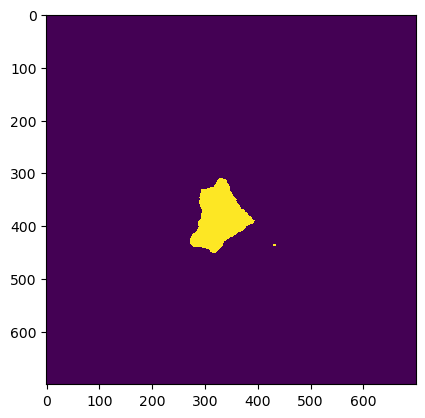

image 1
nonzero:


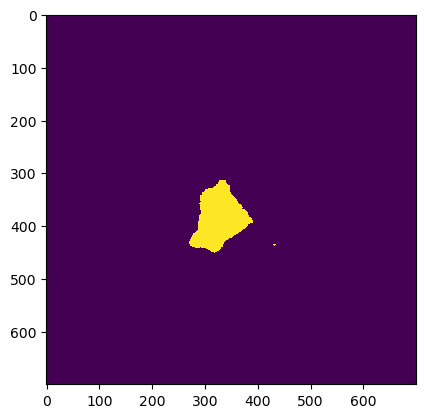

image 2
nonzero:


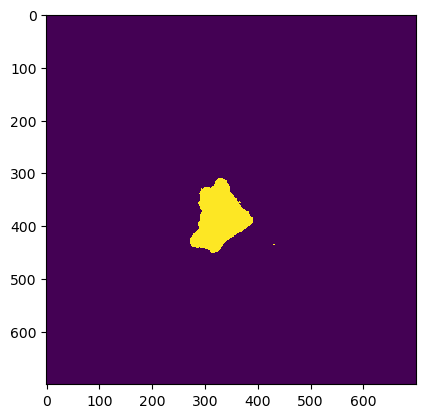

image 3
nonzero:


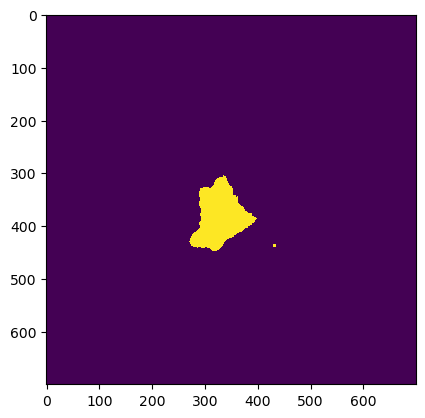

image 4
nonzero:


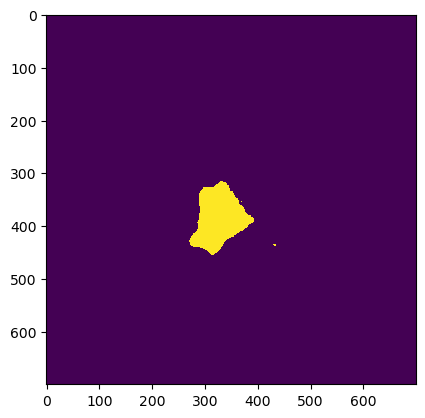

27559670.218750004
image 0
nonzero:


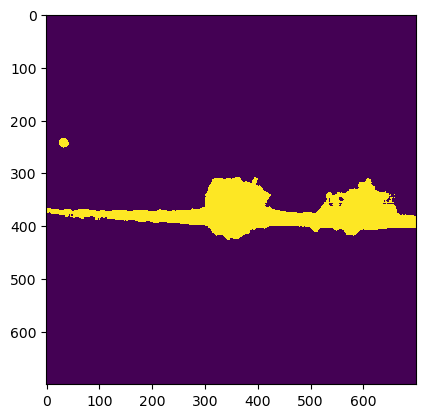

image 1
nonzero:


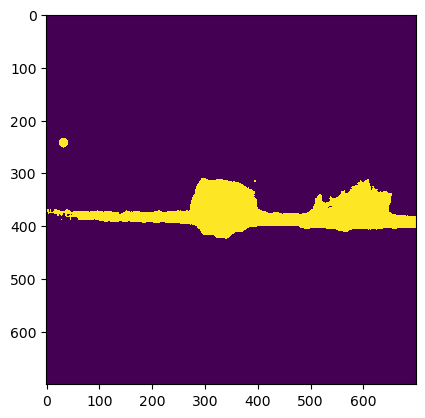

image 2
nonzero:


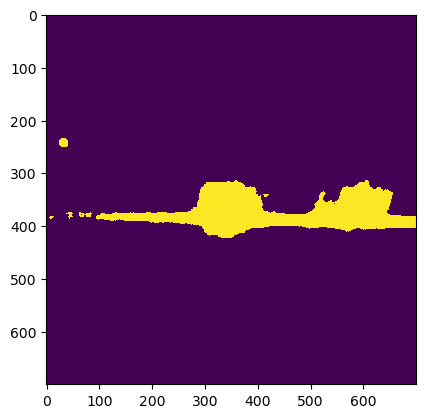

image 3
nonzero:


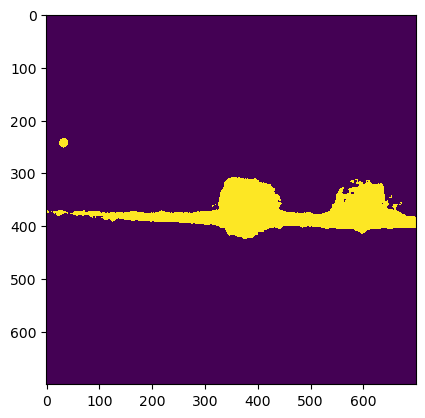

image 4
nonzero:


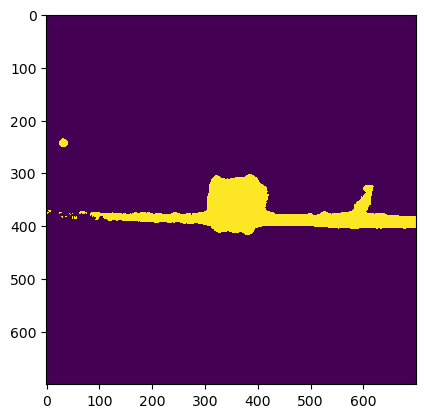

53793636.85


In [50]:
# referennce normalization factor for YAG 14 and 15
reference_img_dyg14 = postprocessing(train_y[4,0,0], verbose=True)
norm_dyg14 = reference_img_dyg14.sum(axis=(-1,-2)).max()
print(norm_dyg14)
reference_img_dyg15 = postprocessing(train_y[4,0,1], verbose=True)
norm_dyg15 = reference_img_dyg15.sum(axis=(-1,-2)).max()
print(norm_dyg15)

In [51]:
train_y_pp = np.zeros((train_y.shape[0], train_y.shape[1], train_y.shape[2], 3, train_y.shape[4], train_y.shape[5]))
x_centers = np.zeros((train_y.shape[0], train_y.shape[1], train_y.shape[2], 3))
y_centers = np.zeros((train_y.shape[0], train_y.shape[1], train_y.shape[2], 3))

n_ks = train_y.shape[0]
n_vs = train_y.shape[1]
n_gs = train_y.shape[2]

for g in range(n_gs):
    if g==0:
        norm = norm_dyg14
    else:    
        norm = norm_dyg15

    for v in range(n_vs):
        for k in range(n_ks):
            pp_imgs = postprocessing(train_y[k,v,g], norm)
            intensities = pp_imgs.sum(axis=(-1,-2))
            top3_ind = np.argpartition(intensities, -3)[-3:]
            top3_imgs = pp_imgs[top3_ind]
            train_y_pp[k,v,g] = top3_imgs
            x_centers[k,v,g], y_centers[k,v,g] = calc_centers(top3_imgs)
            

In [52]:
# remove first and last two quad strengths
#train_y_pp_2 = train_y_pp[2:-2,:,:,:,:,:]
#train_x_physical_units_2 = train_x_physical_units[2:-2,:,:,:]
#x_centers_2 = x_centers[2:-2,:,:,:]
#y_centers_2 = y_centers[2:-2,:,:,:]

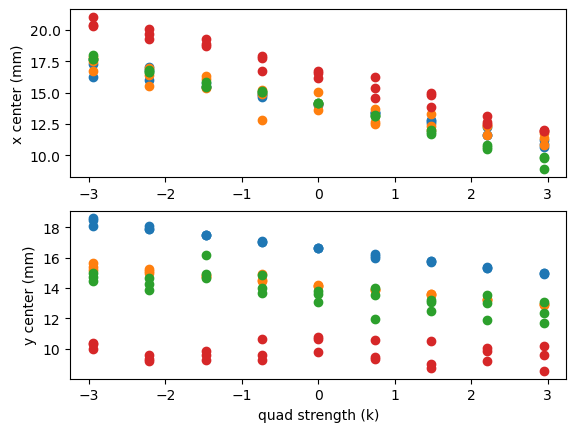

In [53]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
fig, ax = plt.subplots(2)
i_color = 0
factor_1 = 50/1158
factor_2 = 50/1298
for v in range(n_vs):
    for g in range(n_gs):
        color1 = colors[i_color]
        color2 = colors[i_color]
        if g==0:
            factor = factor_1
            label = 'Dipole Off'
        else:
            factor = factor_2
            label = 'Dipole On'
        if v==0:
            label += ', TDC Off'
        else:
            label += ', TDC On'
        ax[0].plot(train_x_physical_units[:,v,g,0], x_centers[:,v,g]*factor, 'o', color=color1, label=label)
        ax[1].plot(train_x_physical_units[:,v,g,0], y_centers[:,v,g]*factor, 'o', color=color2, label=label)
        i_color += 1
ax[0].set_ylabel('x center (mm)')
ax[1].set_ylabel('y center (mm)')
ax[1].set_xlabel('quad strength (k)')
#plt.legend()
plt.show()

--------
[-2.94720509e+00  0.00000000e+00  2.22000000e-16]
image: 0


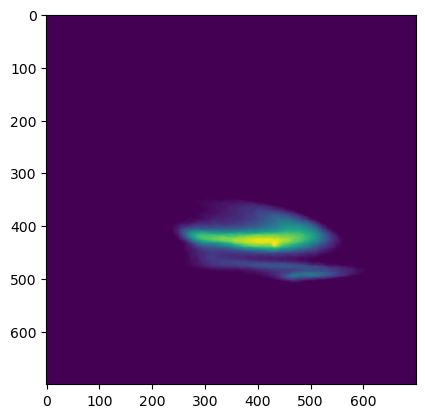

image: 1


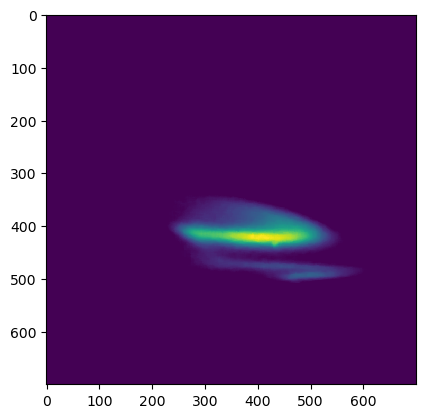

image: 2


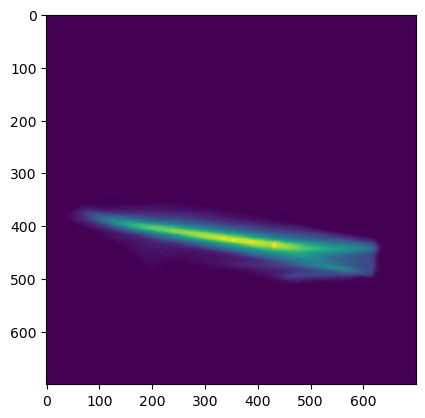

--------
[-2.21040382e+00  0.00000000e+00  2.22000000e-16]
image: 0


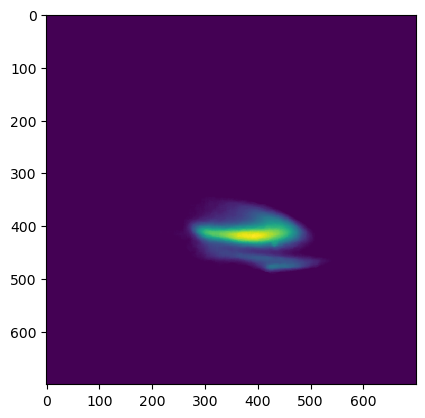

image: 1


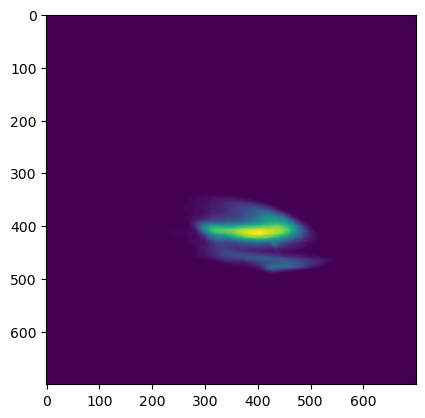

image: 2


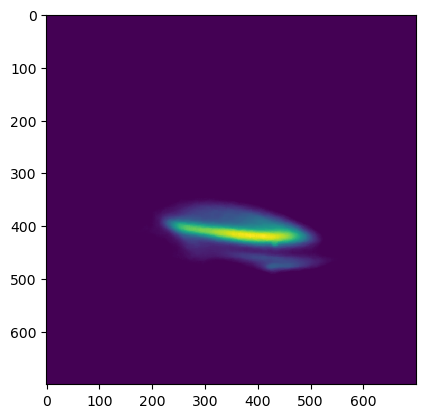

--------
[-1.47360254e+00  0.00000000e+00  2.22000000e-16]
image: 0


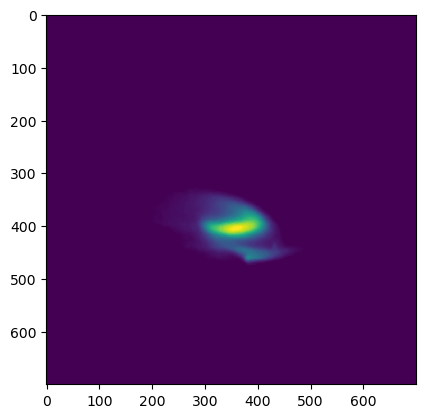

image: 1


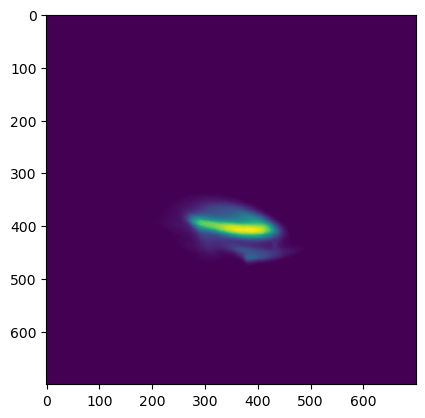

image: 2


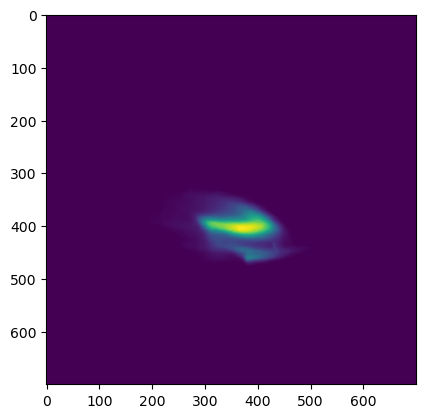

--------
[-7.36801272e-01  0.00000000e+00  2.22000000e-16]
image: 0


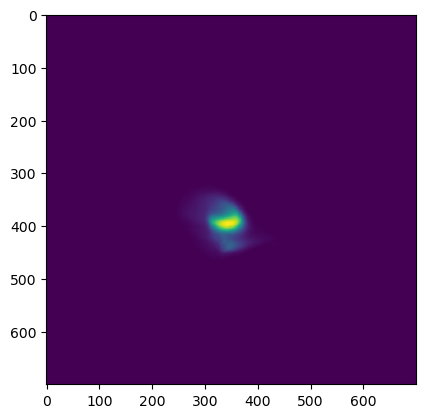

image: 1


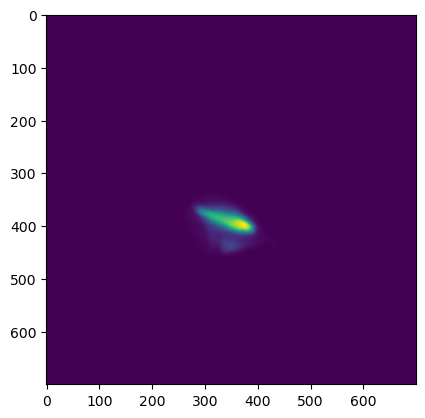

image: 2


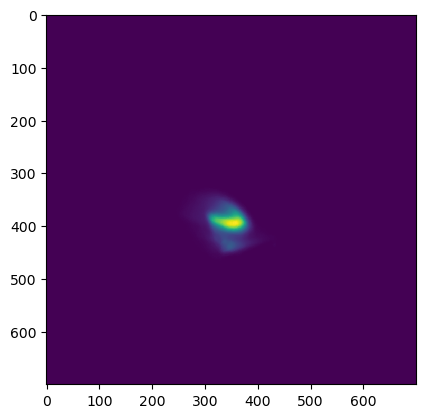

--------
[0.00e+00 0.00e+00 2.22e-16]
image: 0


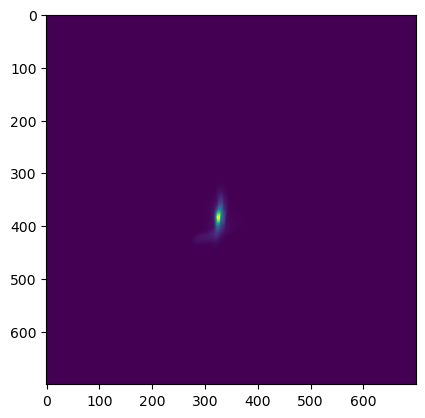

image: 1


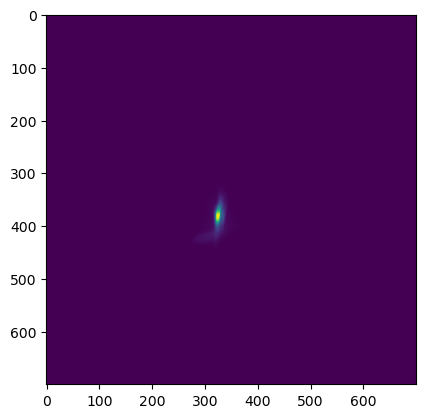

image: 2


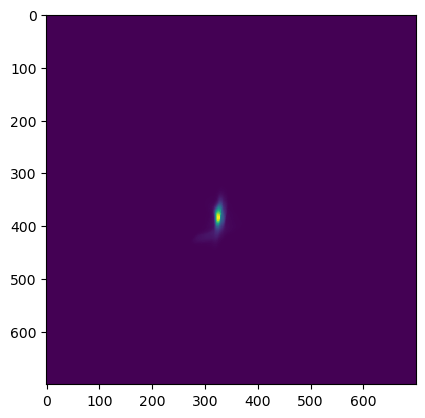

--------
[7.36801272e-01 0.00000000e+00 2.22000000e-16]
image: 0


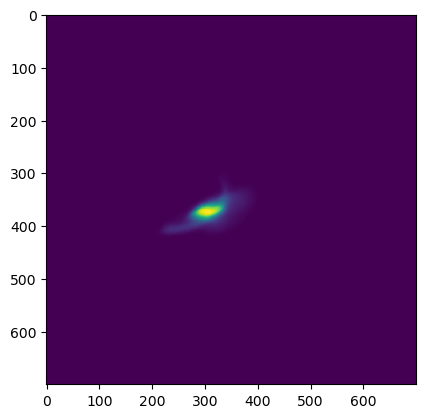

image: 1


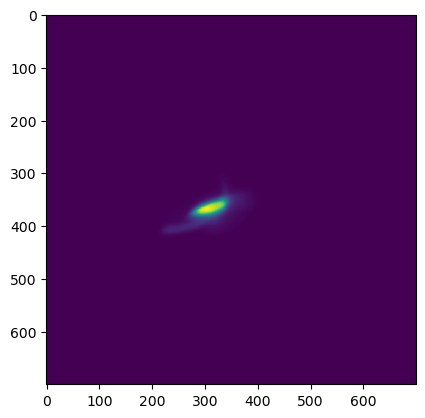

image: 2


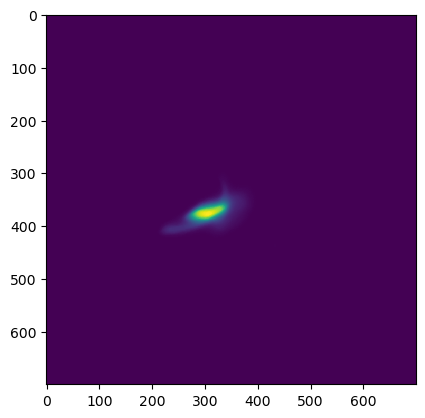

--------
[1.47360254e+00 0.00000000e+00 2.22000000e-16]
image: 0


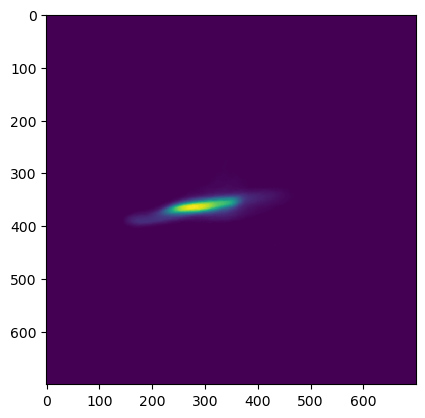

image: 1


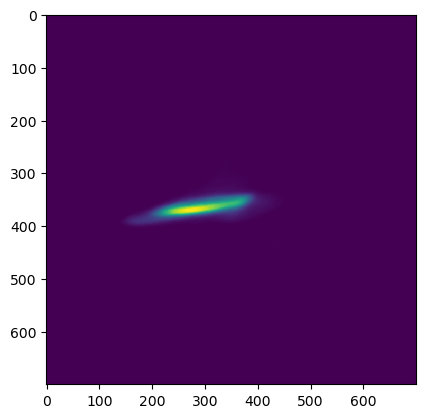

image: 2


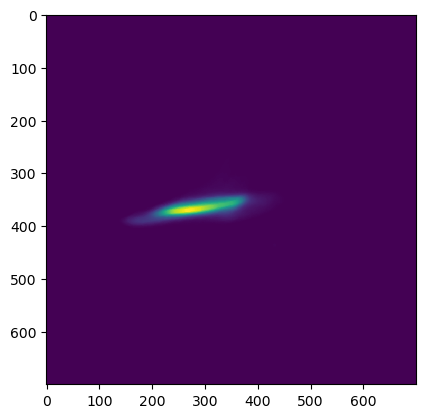

--------
[2.21040382e+00 0.00000000e+00 2.22000000e-16]
image: 0


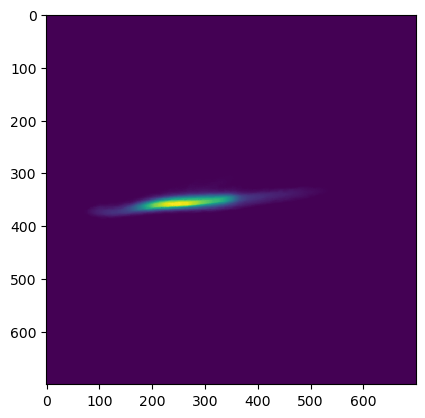

image: 1


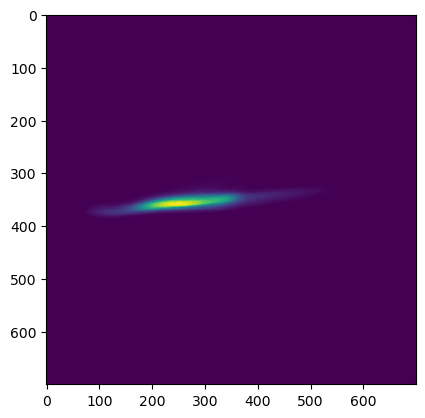

image: 2


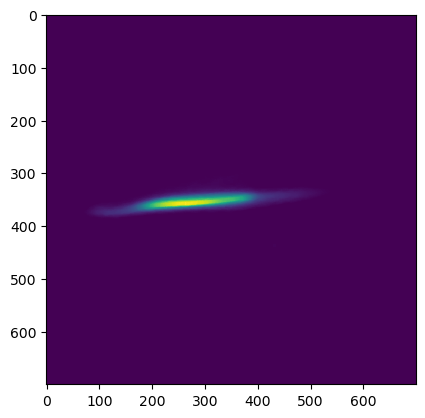

--------
[2.94720509e+00 0.00000000e+00 2.22000000e-16]
image: 0


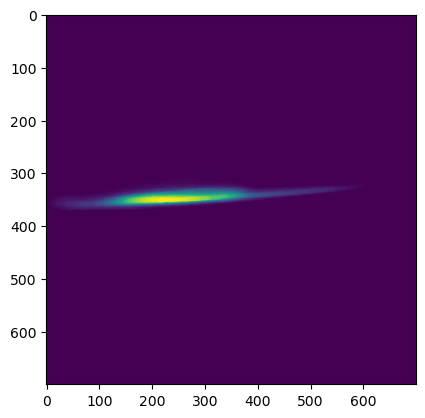

image: 1


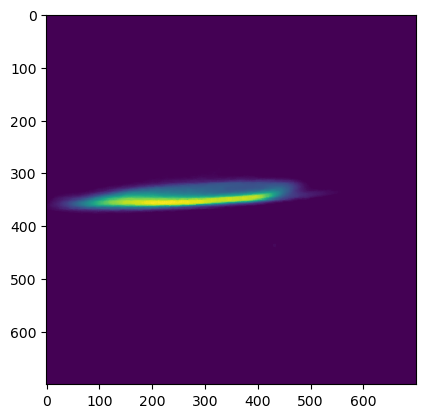

image: 2


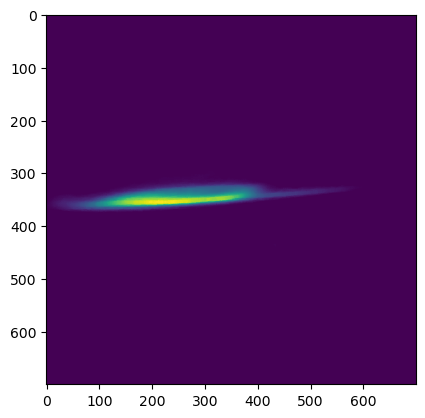

--------
[-2.94720509e+00  3.70000000e+06  2.22000000e-16]
image: 0


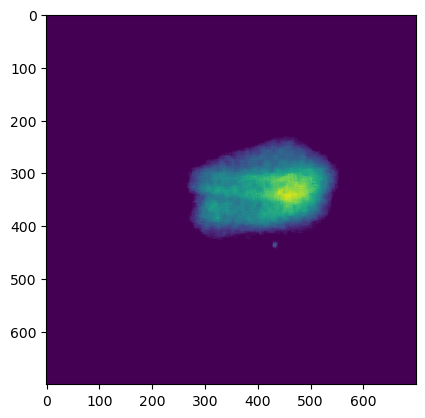

image: 1


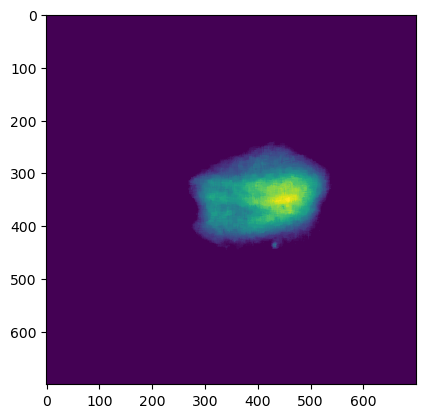

image: 2


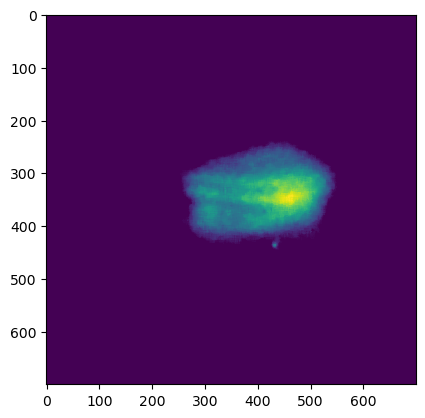

--------
[-2.21040382e+00  3.70000000e+06  2.22000000e-16]
image: 0


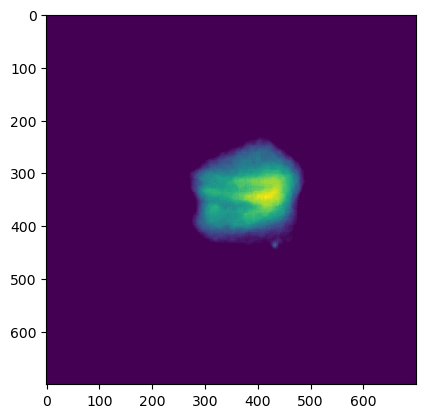

image: 1


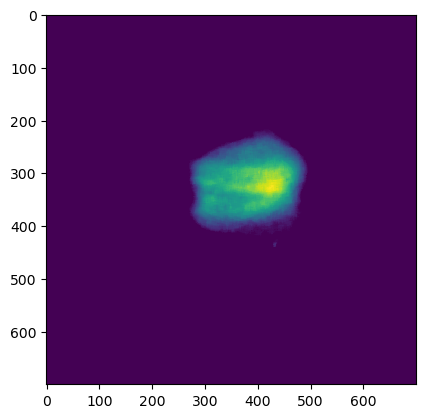

image: 2


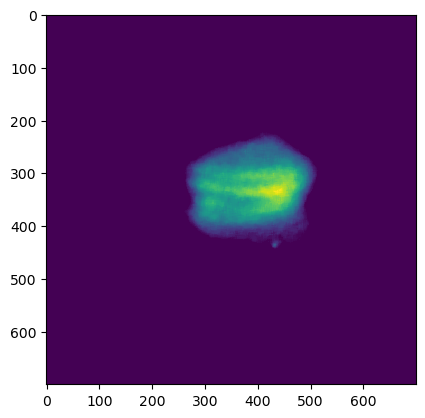

--------
[-1.47360254e+00  3.70000000e+06  2.22000000e-16]
image: 0


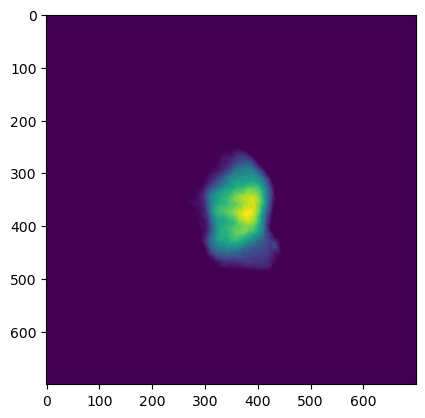

image: 1


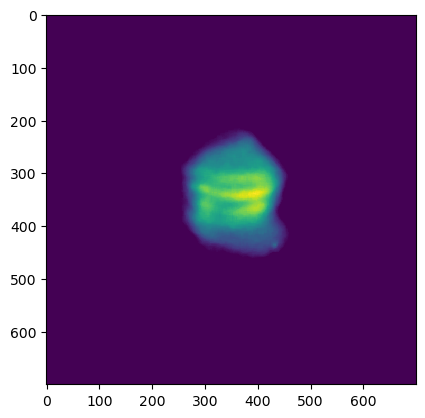

image: 2


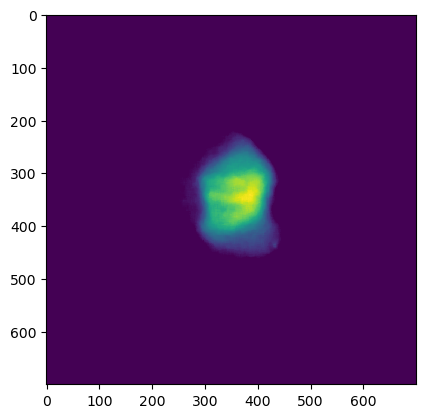

--------
[-7.36801272e-01  3.70000000e+06  2.22000000e-16]
image: 0


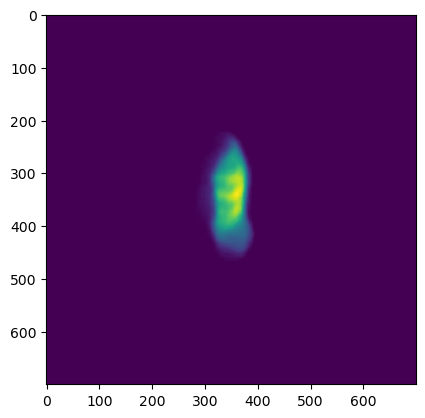

image: 1


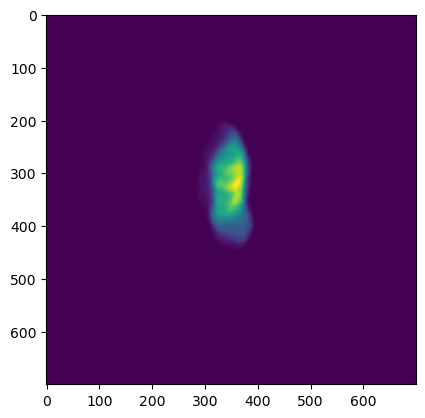

image: 2


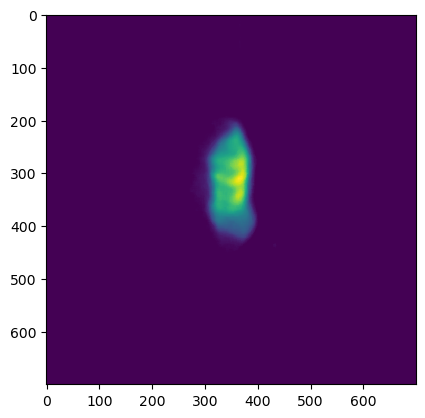

--------
[0.00e+00 3.70e+06 2.22e-16]
image: 0


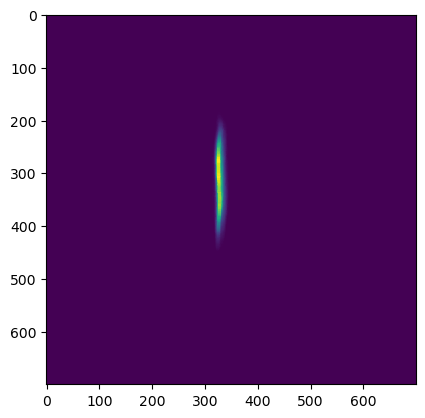

image: 1


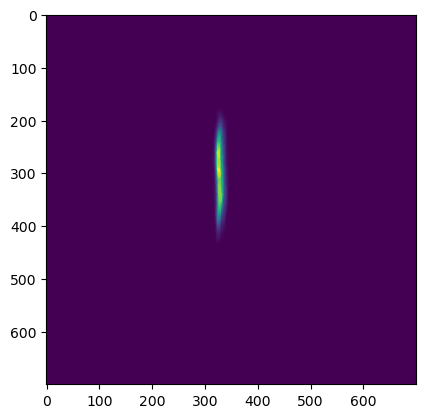

image: 2


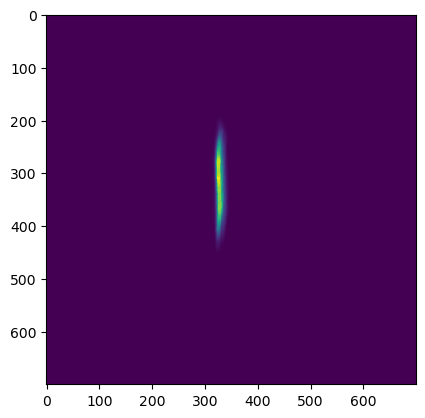

--------
[7.36801272e-01 3.70000000e+06 2.22000000e-16]
image: 0


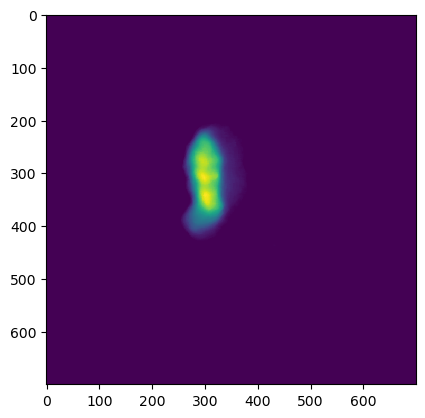

image: 1


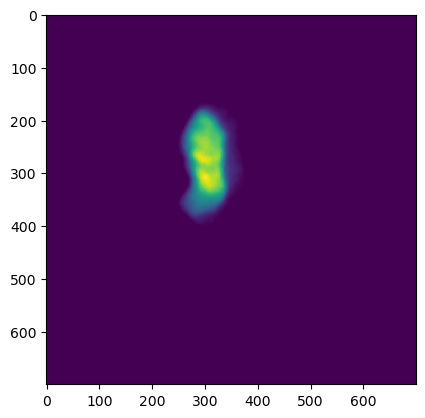

image: 2


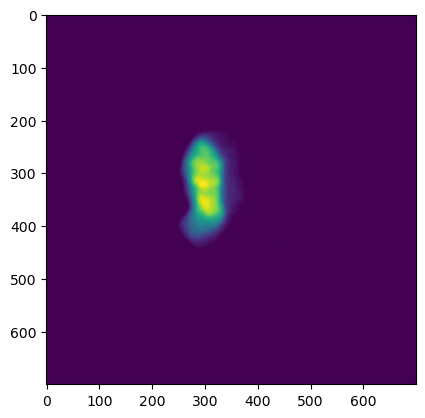

--------
[1.47360254e+00 3.70000000e+06 2.22000000e-16]
image: 0


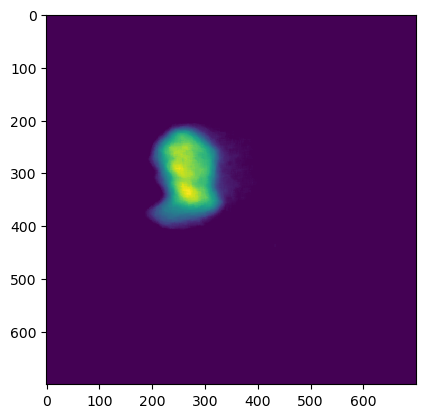

image: 1


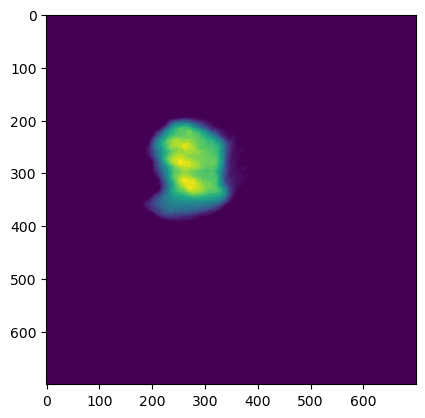

image: 2


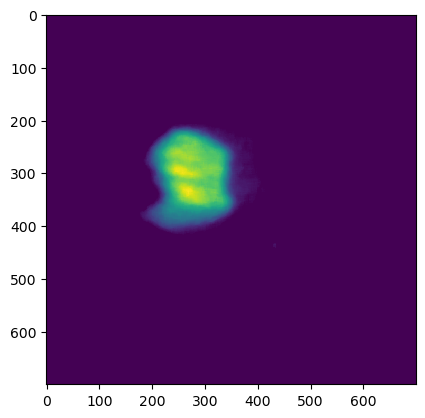

--------
[2.21040382e+00 3.70000000e+06 2.22000000e-16]
image: 0


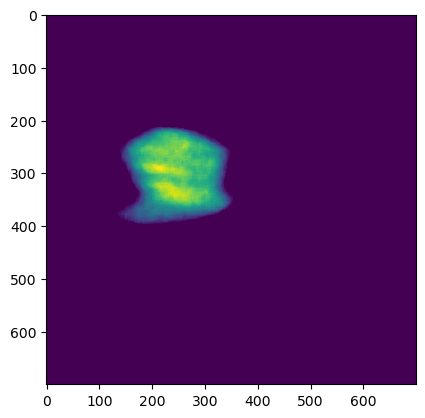

image: 1


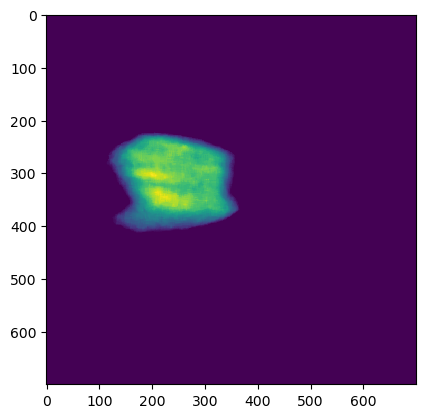

image: 2


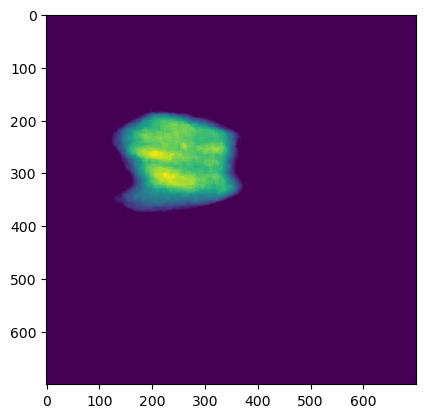

--------
[2.94720509e+00 3.70000000e+06 2.22000000e-16]
image: 0


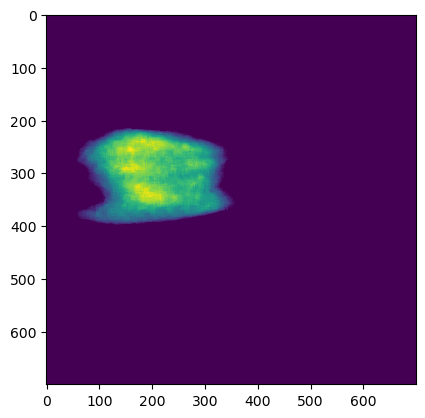

image: 1


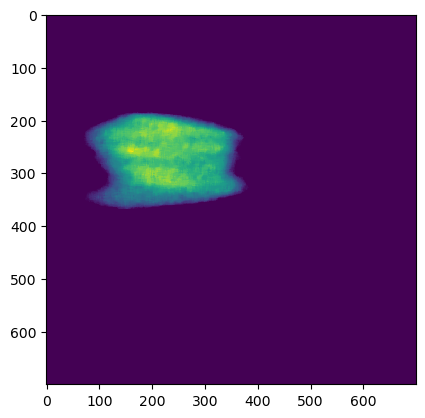

image: 2


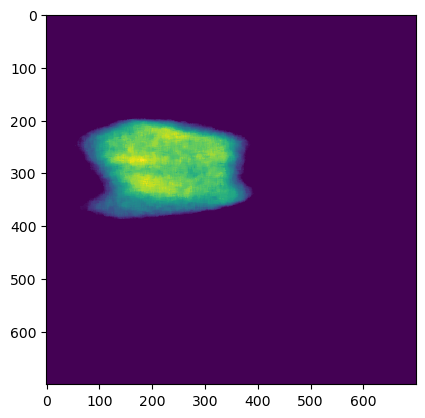

--------
[-2.94720509  0.          1.15075268]
image: 0


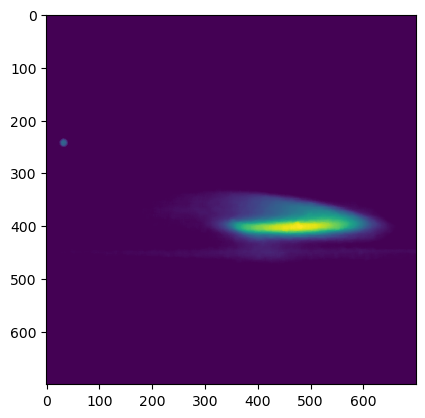

image: 1


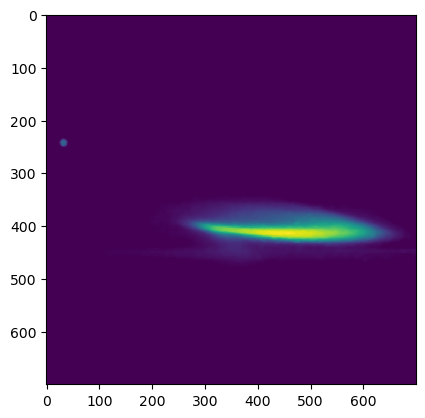

image: 2


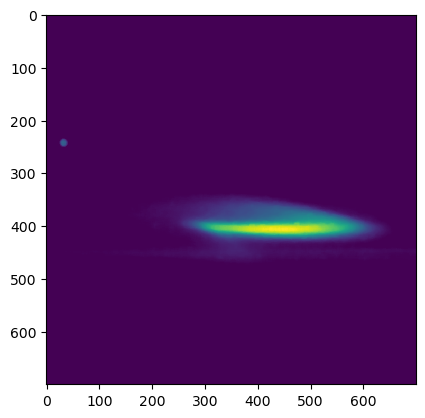

--------
[-2.21040382  0.          1.15075268]
image: 0


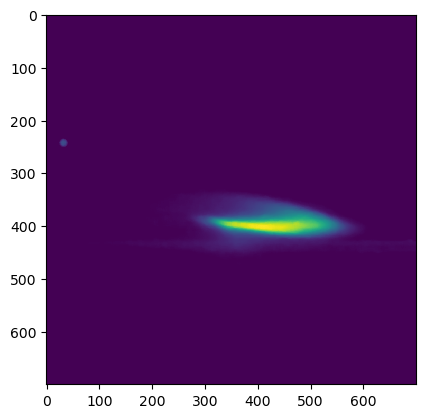

image: 1


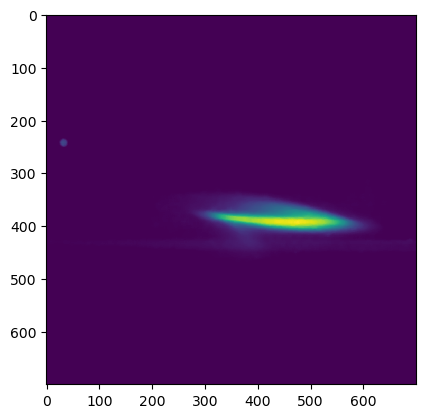

image: 2


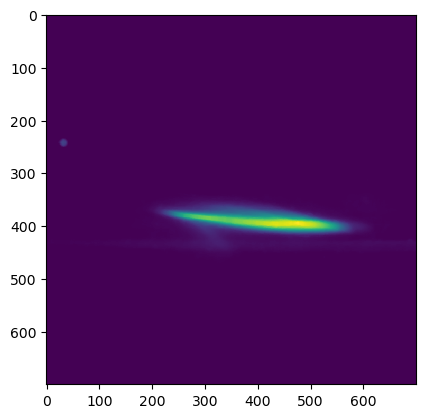

--------
[-1.47360254  0.          1.15075268]
image: 0


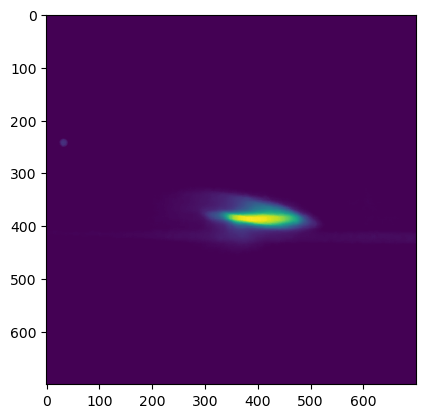

image: 1


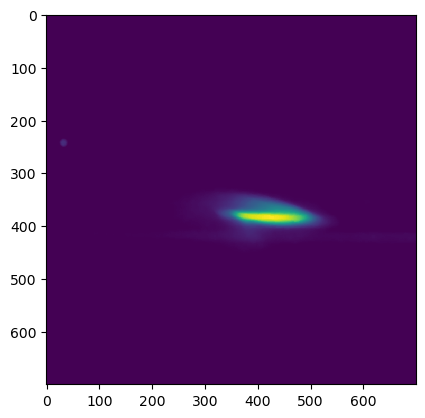

image: 2


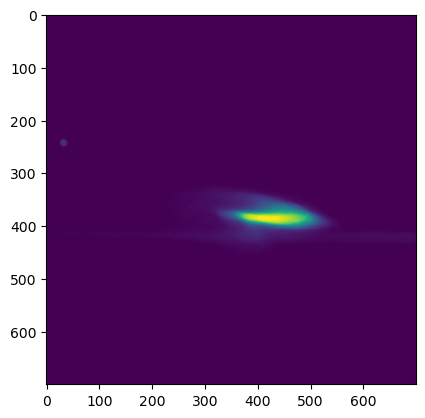

--------
[-0.73680127  0.          1.15075268]
image: 0


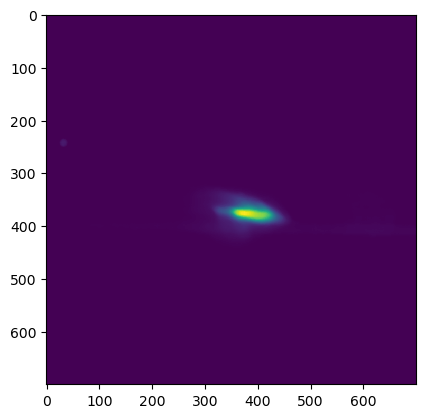

image: 1


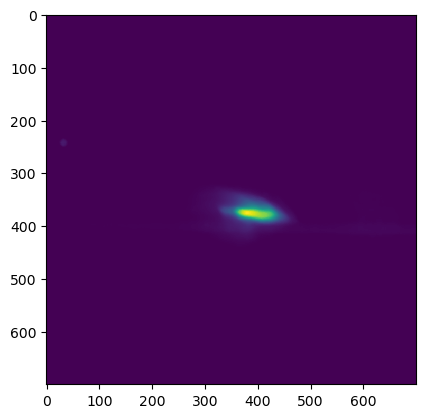

image: 2


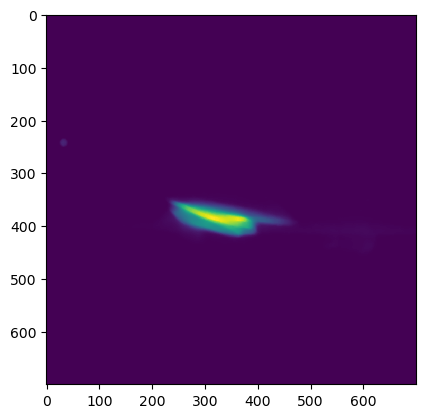

--------
[0.         0.         1.15075268]
image: 0


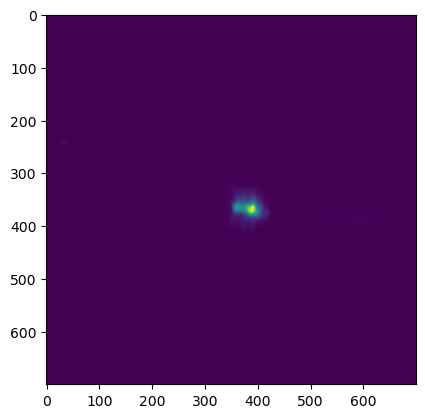

image: 1


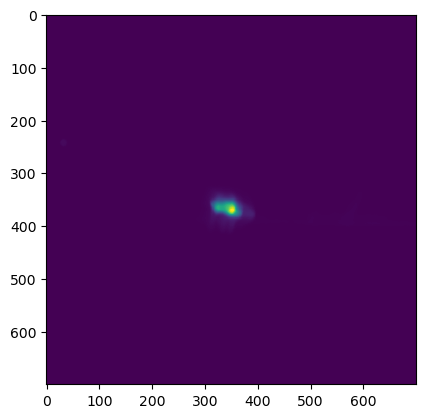

image: 2


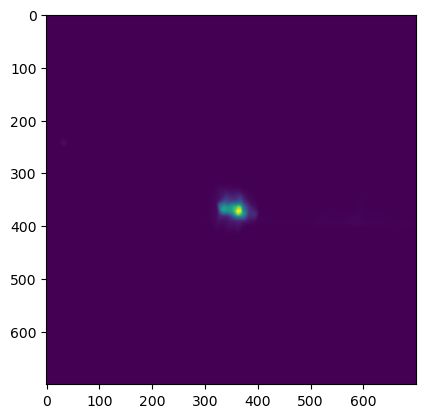

--------
[0.73680127 0.         1.15075268]
image: 0


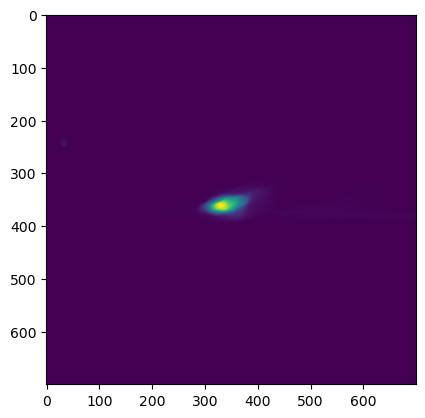

image: 1


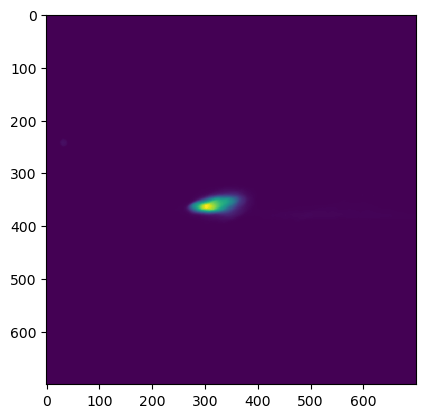

image: 2


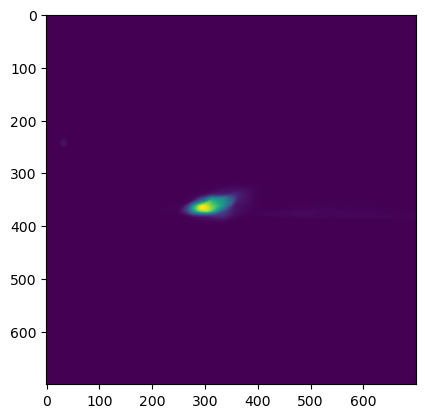

--------
[1.47360254 0.         1.15075268]
image: 0


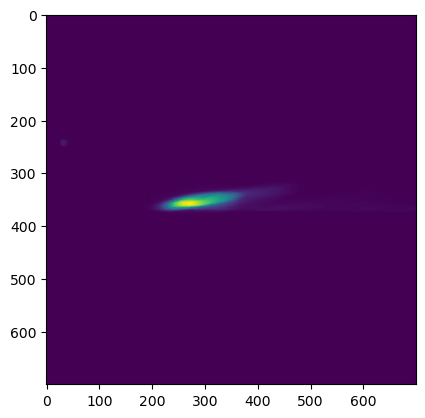

image: 1


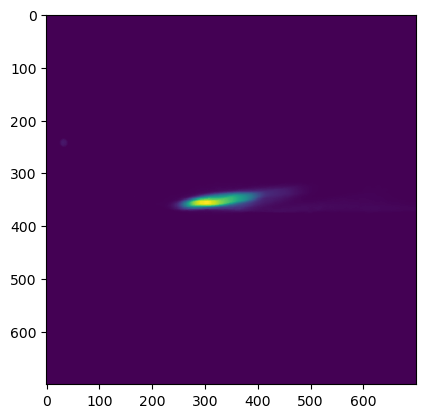

image: 2


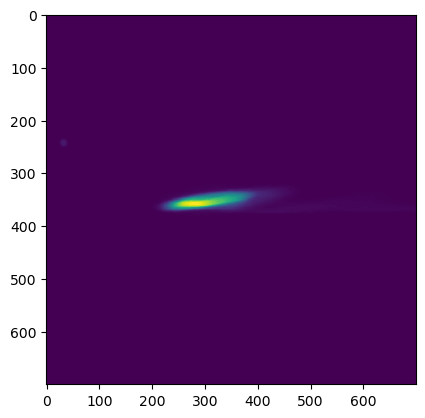

--------
[2.21040382 0.         1.15075268]
image: 0


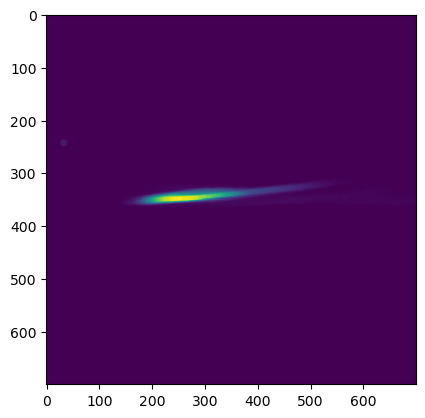

image: 1


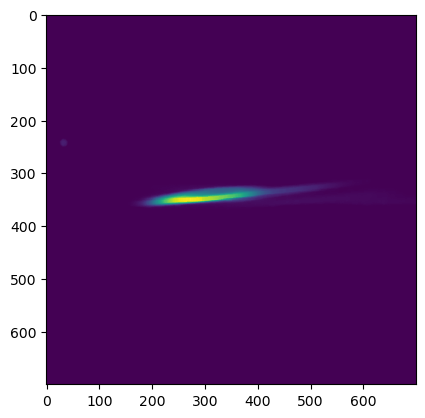

image: 2


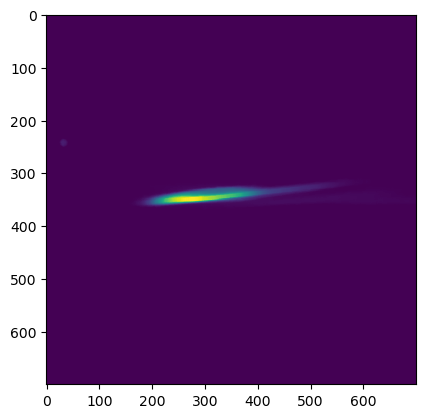

--------
[2.94720509 0.         1.15075268]
image: 0


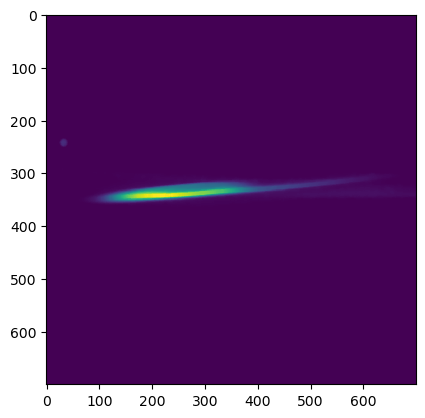

image: 1


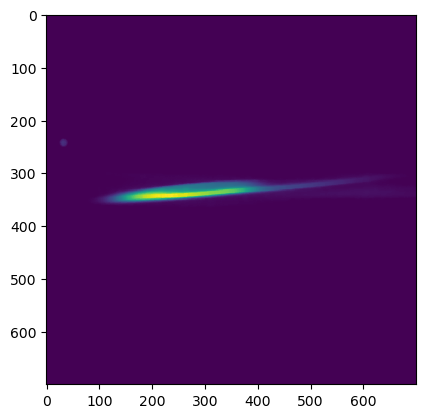

image: 2


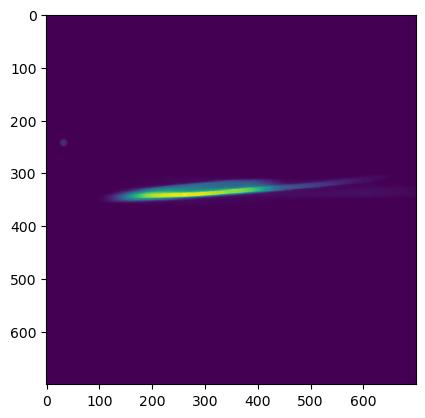

--------
[-2.94720509e+00  3.70000000e+06  1.15075268e+00]
image: 0


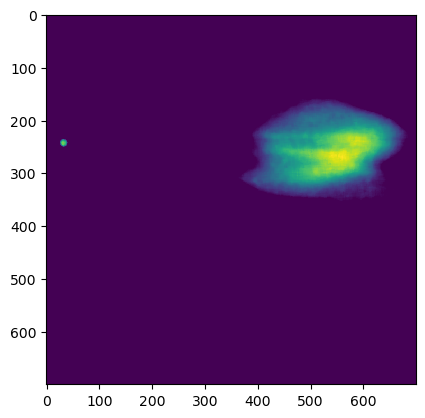

image: 1


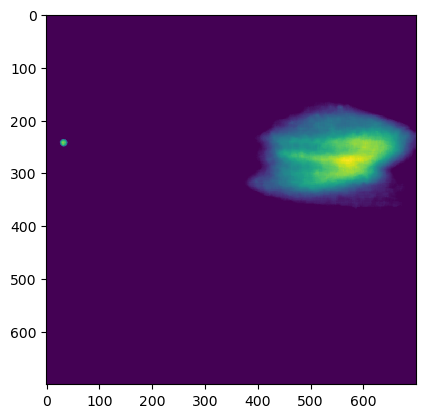

image: 2


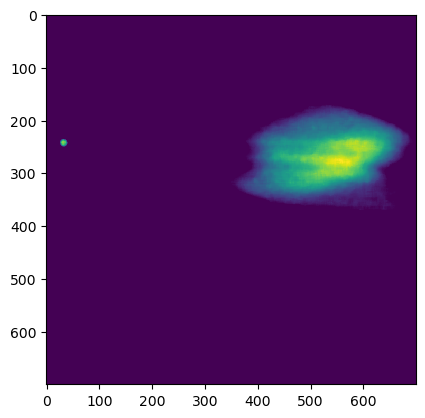

--------
[-2.21040382e+00  3.70000000e+06  1.15075268e+00]
image: 0


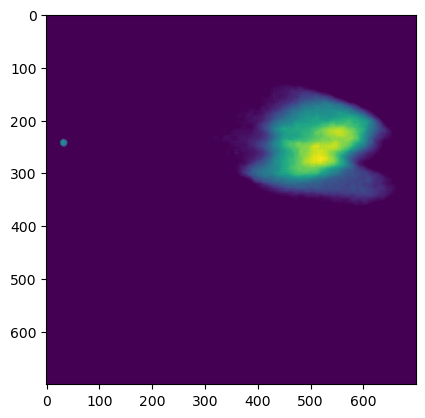

image: 1


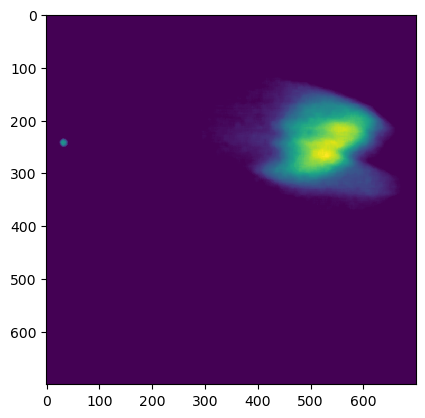

image: 2


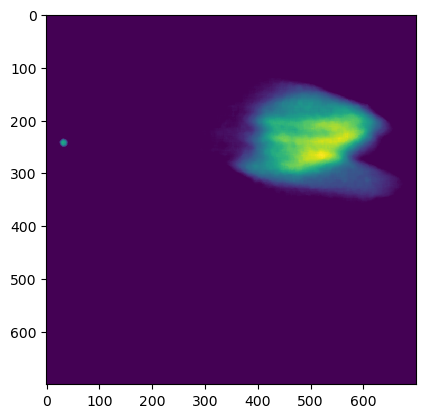

--------
[-1.47360254e+00  3.70000000e+06  1.15075268e+00]
image: 0


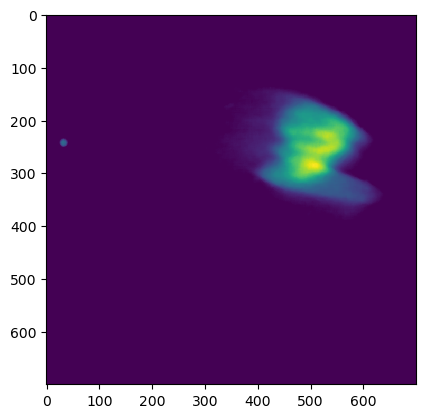

image: 1


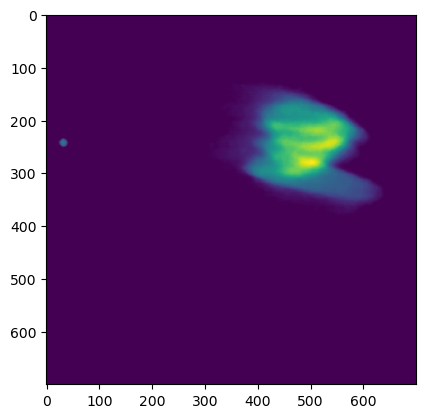

image: 2


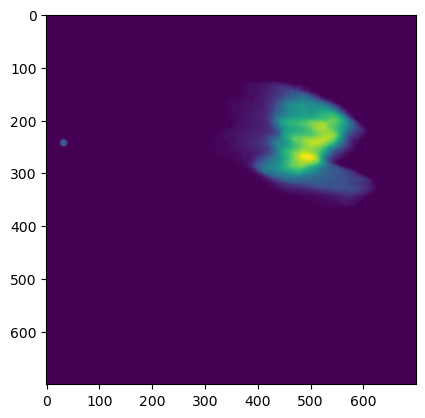

--------
[-7.36801272e-01  3.70000000e+06  1.15075268e+00]
image: 0


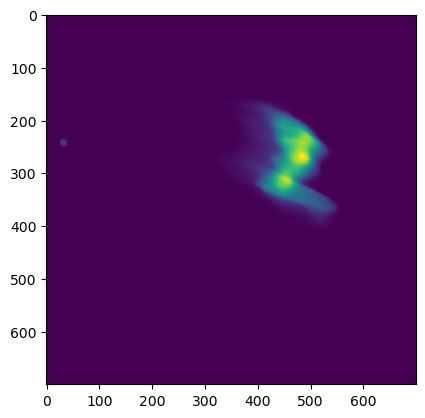

image: 1


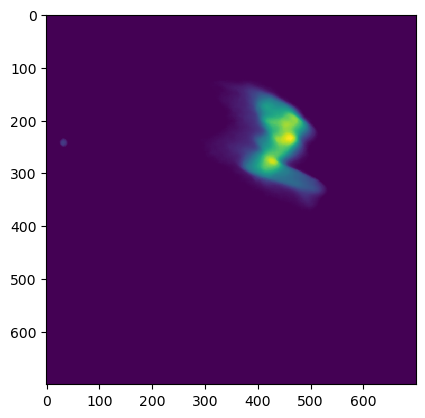

image: 2


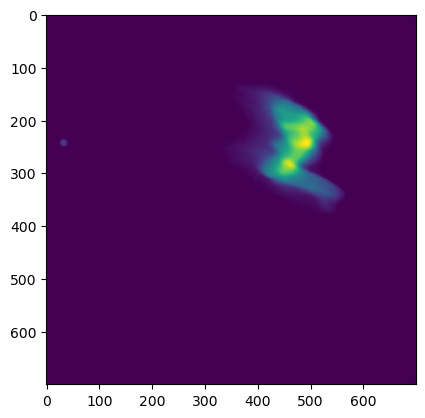

--------
[0.00000000e+00 3.70000000e+06 1.15075268e+00]
image: 0


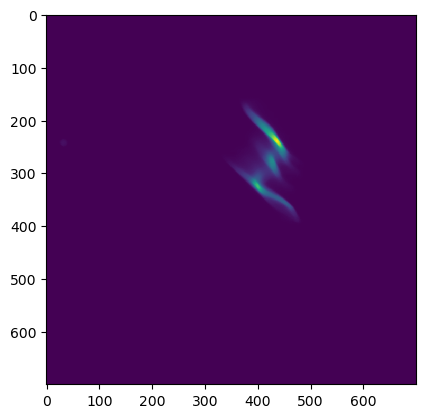

image: 1


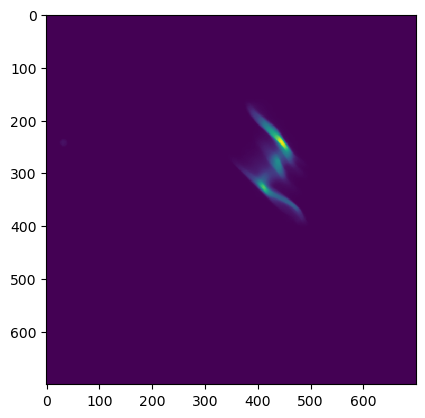

image: 2


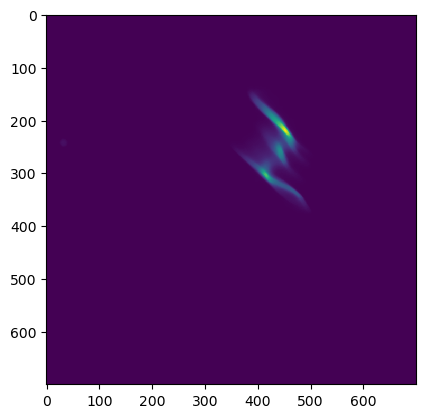

--------
[7.36801272e-01 3.70000000e+06 1.15075268e+00]
image: 0


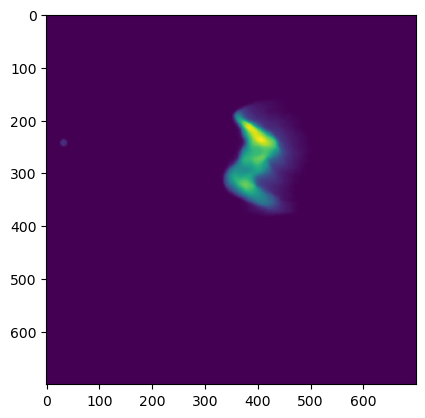

image: 1


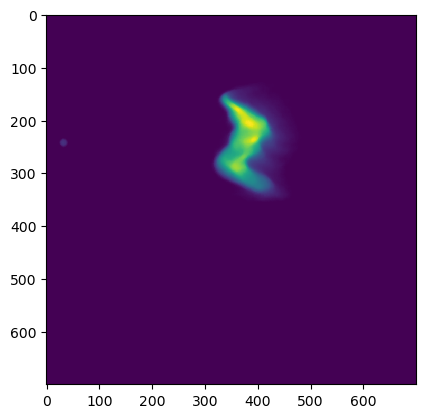

image: 2


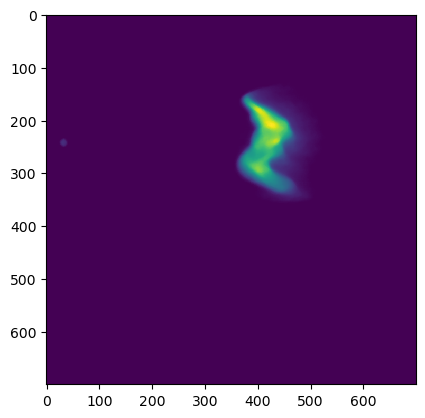

--------
[1.47360254e+00 3.70000000e+06 1.15075268e+00]
image: 0


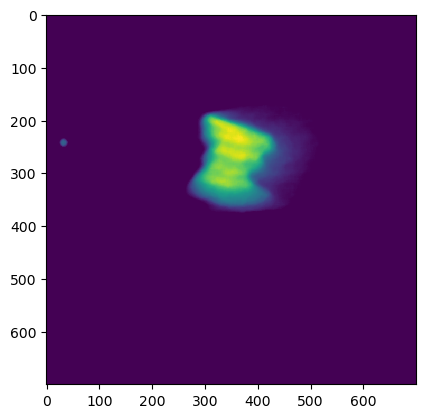

image: 1


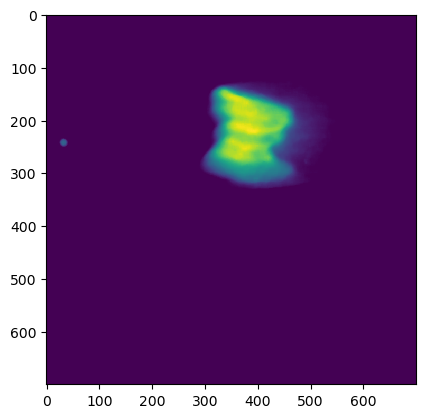

image: 2


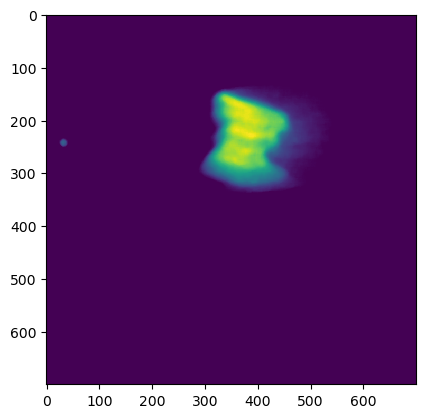

--------
[2.21040382e+00 3.70000000e+06 1.15075268e+00]
image: 0


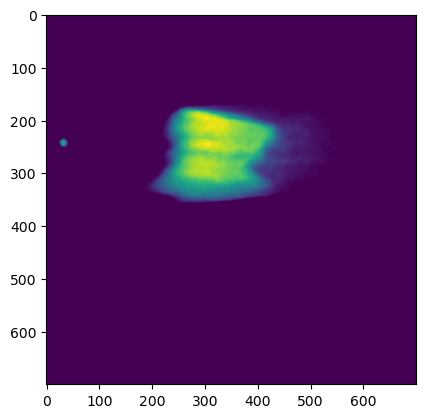

image: 1


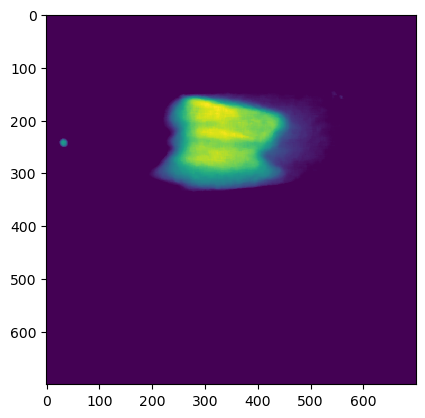

image: 2


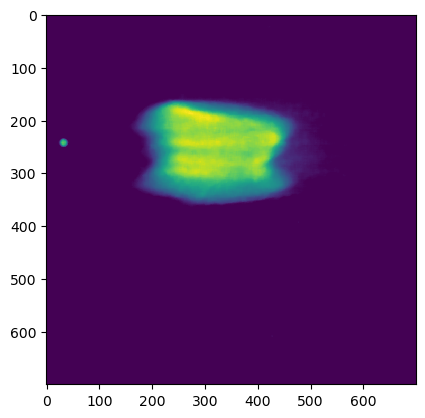

--------
[2.94720509e+00 3.70000000e+06 1.15075268e+00]
image: 0


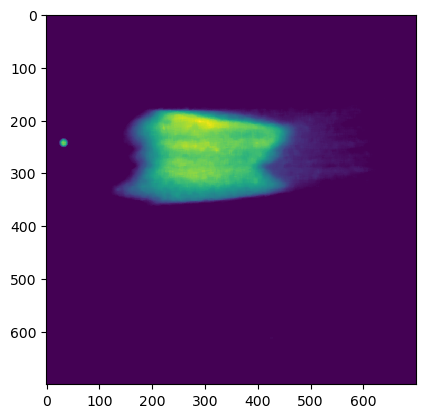

image: 1


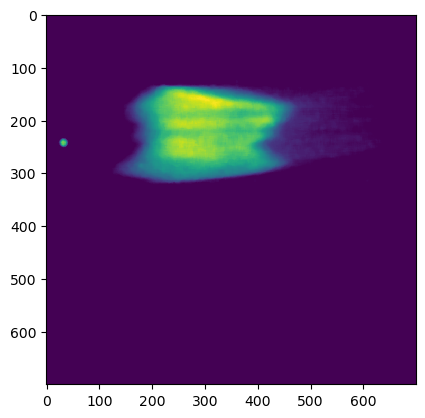

image: 2


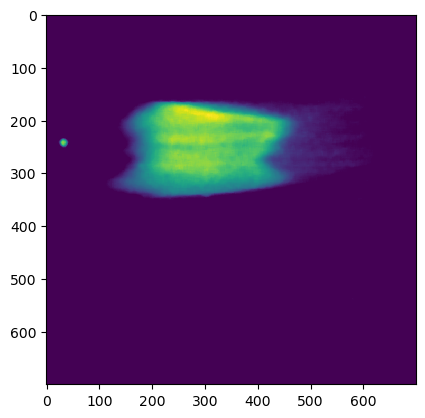

In [54]:
#visualize final images
for g in range(n_gs):
    for v in range(n_vs):
        for k in range(n_ks):
            print('--------')
            print(train_x_physical_units[k,v,g])
            for i, img in enumerate(train_y_pp[k,v,g]):
                print(f'image: {i}')
                plt.imshow(img, interpolation='none')
                plt.show()

In [55]:
# save as image dset
import torch
from phase_space_reconstruction.modeling import ImageDataset3D
#transpose images so that x,y are in the correct order for the last two dimensions:
train_y_pp_t = train_y_pp.transpose([0,1,2,3,5,4])
dset = ImageDataset3D(
    torch.tensor(train_x_physical_units),
    torch.tensor(train_y_pp_t))
torch.save(dset, os.path.join(data_path,'dset_3d_01_16_full_scan_6.pt'))

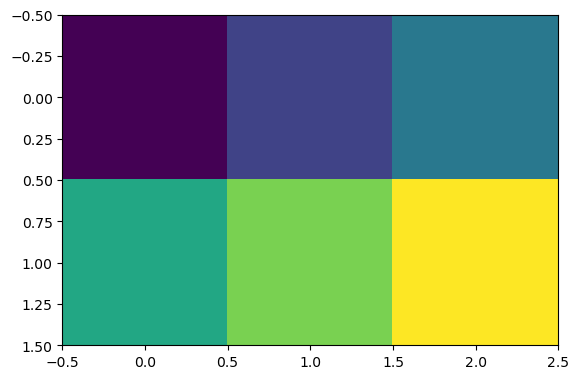

In [27]:
a = np.array([[1,2,3],[4,5,6]])
plt.imshow(a, interpolation='none')